# **Drive Mounting**

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# **unzipping your dataset from Google Drive into Colab and then loading the CSV file.**

In [ ]:
# 📦 Unzip the dataset
import zipfile
import pandas as pd

zip_path = "/content/drive/MyDrive/online_shopping_10_cats.zip"  # Path in Colab after upload
extract_dir = "/content/online_shopping_10_cats"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# 📂 Find the CSV file inside the extracted folder
import os
for root, dirs, files in os.walk(extract_dir):
    for file in files:
        if file.endswith(".csv"):
            csv_path = os.path.join(root, file)
            print("Found CSV:", csv_path)

# 📖 Load the dataset
df = pd.read_csv(csv_path)
print("Dataset Shape:", df.shape)
df.head()


Found CSV: /content/online_shopping_10_cats/online_shopping_10_cats.csv
Dataset Shape: (62774, 3)


,cat,label,review
0,书籍,1,﻿做父母一定要有刘墉这样的心态，不断地学习，不断地进步，不断地给自己补充新鲜血液，让自己保持...
1,书籍,1,作者真有英国人严谨的风格，提出观点、进行论述论证，尽管本人对物理学了解不深，但是仍然能感受到...
2,书籍,1,作者长篇大论借用详细报告数据处理工作和计算结果支持其新观点。为什么荷兰曾经县有欧洲最高的生产...
3,书籍,1,作者在战几时之前用了＂拥抱＂令人叫绝．日本如果没有战败，就有会有美军的占领，没胡官僚主义的延...
4,书籍,1,作者在少年时即喜阅读，能看出他精读了无数经典，因而他有一个庞大的内心世界。他的作品最难能可贵...


# **translation + NLP environment**

In [ ]:
!pip install deep-translator langdetect
!pip install transformers sentencepiece sacremoses --quiet

import pandas as pd
import torch
from tqdm import tqdm #Progress bar library
from transformers import MarianMTModel, MarianTokenizer #Converts text ↔ tokens


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 27.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.7 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993223 sha256=b3595c9f78ad2e488f11d88b916957c0a0dfef86c76508cfefeaba33ff2aac38
  Stored in directory: /root/.cache/pip/wheels/0a/f2/b2/e5ca405801e05eb7c8ed5b3b4bcf1fcabcd6272c167640072e
Successfully built langdetect
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 17.6 MB/s eta 0:00:00


# **split one big CSV file into 3 smaller CSV files**

In [ ]:
# import pandas as pd

# input_path = "/content/online_shopping_10_cats/online_shopping_10_cats.csv"
# df = pd.read_csv(input_path)

# # Split into 3 equal parts
# parts = 3
# chunk_size = len(df) // parts

# for i in range(parts):
#     start = i * chunk_size
#     end = None if i == parts - 1 else (i + 1) * chunk_size
#     df.iloc[start:end].to_csv(f"/content/part_{i+1}.csv", index=False)

# print("✅ Dataset split into part_1.csv, part_2.csv, part_3.csv")


✅ Dataset split into part_1.csv, part_2.csv, part_3.csv


# **batch translation pipeline in Colab using MarianMT (Chinese → English).**

In [ ]:
# !pip install transformers sentencepiece sacremoses --quiet

# import pandas as pd
# import torch
# from tqdm import tqdm
# from transformers import MarianMTModel, MarianTokenizer

# # === SETTINGS ===
# input_path = "/content/part_3.csv"  # change for each tab
# output_path = "/content/english_part_3.csv"  # change for each tab
# model_name = "Helsinki-NLP/opus-mt-zh-en"
# batch_size = 48  # T4 GPU can handle this with fp16

# # === LOAD DATA ===
# df = pd.read_csv(input_path)
# reviews = df['review'].astype(str).tolist()

# # === LOAD MODEL ===
# device = "cuda" if torch.cuda.is_available() else "cpu"
# tokenizer = MarianTokenizer.from_pretrained(model_name, use_fast=True)
# model = MarianMTModel.from_pretrained(model_name, torch_dtype=torch.float16).to(device)

# # === TRANSLATION FUNCTION ===
# def translate_batch(texts):
#     batch = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512).to(device)
#     with torch.no_grad():
#         translated = model.generate(**batch)
#     return tokenizer.batch_decode(translated, skip_special_tokens=True)

# # === TRANSLATE ===
# translated_reviews = []
# for i in tqdm(range(0, len(reviews), batch_size), desc="Translating"):
#     batch_texts = reviews[i:i+batch_size]
#     translated_reviews.extend(translate_batch(batch_texts))
#     torch.cuda.empty_cache()

# # === SAVE ===
# df['review_en'] = translated_reviews
# df.to_csv(output_path, index=False)

# print(f"✅ Done! Saved to {output_path}")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 16.6 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/805k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/807k [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

config.json: 0.00B [00:00, ?B/s]

pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]


Translating: 100%|██████████| 436/436 [1:54:54<00:00, 15.81s/it]

✅ Done! Saved to /content/english_part_3.csv


# **merge + restore-order script to combine all translated parts into one final dataset.**

In [ ]:
# import pandas as pd

# # === Paths ===
# original_file = "/content/online_shopping_10_cats/online_shopping_10_cats.csv"
# translated_parts = [
#     "/content/drive/MyDrive/english_part_1.csv",
#     "/content/drive/MyDrive/english_part_2.csv",
#     "/content/drive/MyDrive/english_part_3.csv"
# ]
# output_path = "/content/drive/MyDrive/english_all_sorted.csv"

# # === Read original dataset ===
# original_df = pd.read_csv(original_file)
# original_df["row_id"] = range(len(original_df))  # Preserve order

# # === Read and merge translated files ===
# translated_df = pd.concat([pd.read_csv(f) for f in translated_parts], ignore_index=True)

# # === Merge keeping original order ===
# # Assumes 'review' column exists in both and matches for mapping
# merged_df = original_df.merge(translated_df, on="review", how="left")

# # === Sort back to original ===
# merged_df = merged_df.sort_values(by="row_id").drop(columns=["row_id"])

# # === Save final file ===
# merged_df.to_csv(output_path, index=False)

# print(f"✅ Final sorted CSV saved at: {output_path}")
# print(f"Total rows: {len(merged_df)}")


✅ Final sorted CSV saved at: /content/drive/MyDrive/english_all_sorted.csv
Total rows: 62882


# **setup part of a training pipeline using Hugging Face 🤗 Transformers**

In [ ]:
# --- Fallback training code (compatible with older transformers) ---
!pip install -q transformers datasets evaluate scikit-learn

import pandas as pd
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from datasets import Dataset, DatasetDict
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification, Trainer, TrainingArguments
import evaluate
from sklearn.metrics import f1_score


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 4.6 MB/s eta 0:00:00


# **loading and preparing your dataset for training**

In [ ]:
# Paths — adjust if necessary
CSV_PATH = "/content/drive/MyDrive/english_all_sorted.csv"

# 1) Load data (ensure columns exist)
df = pd.read_csv(CSV_PATH)
text_col = "review_en"
label_col = "label_y"
df = df[[text_col, label_col]].dropna()
df[label_col] = df[label_col].astype(int)
df = df[df[label_col].isin([0,1])]   # keep only 0/1

# **splitting the cleaned dataset into training and validation sets.**

In [ ]:

# 2) Train/val split
train_df, val_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df[label_col])
train_ds = Dataset.from_pandas(train_df.reset_index(drop=True))
val_ds   = Dataset.from_pandas(val_df.reset_index(drop=True))


# **Tokenization + Dataset formatting**

In [ ]:

# 3) Tokenize
tokenizer = DistilBertTokenizerFast.from_pretrained("distilbert-base-uncased")
def tokenize_fn(batch):
    texts = [str(x) for x in batch[text_col]]
    return tokenizer(texts, padding="max_length", truncation=True, max_length=128)
train_ds = train_ds.map(tokenize_fn, batched=True, remove_columns=train_ds.column_names)
val_ds   = val_ds.map(tokenize_fn, batched=True, remove_columns=val_ds.column_names)

# Reattach labels (since remove_columns removed them)
train_ds = train_ds.add_column("labels", train_df[label_col].astype(int).reset_index(drop=True))
val_ds   = val_ds.add_column("labels", val_df[label_col].astype(int).reset_index(drop=True))

train_ds.set_format(type="torch", columns=["input_ids","attention_mask","labels"])
val_ds.set_format(type="torch", columns=["input_ids","attention_mask","labels"])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

Map:   0%|          | 0/50304 [00:00<?, ? examples/s]

Map:   0%|          | 0/12577 [00:00<?, ? examples/s]

# **DistilBERT model for classification**

In [ ]:
# 4) Model
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# **training setup stage**

In [ ]:

# 5) TrainingArguments WITHOUT evaluation_strategy (older compatible)
training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=3,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    learning_rate=2e-5,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_steps=200,
    save_total_limit=2,
    fp16=torch.cuda.is_available()
)

# **metrics stage = (numbers (scores) that tell us how well a model is performing.)**

In [ ]:
# 6) Metrics
accuracy_metric = evaluate.load("accuracy")
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=-1)
    acc = accuracy_metric.compute(predictions=preds, references=labels)["accuracy"]
    f1 = f1_score(labels, preds)
    return {"accuracy": acc, "f1": f1}


# **high-level training loop provided by Hugging Face 🤗 Transformers**

In [ ]:
# 7) Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,   # trainer.evaluate() will use this
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/tmp/ipython-input-1658640445.py:2: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


# **Train(no built-in epoch evaluation in older envs) — you will still get logging & saves**

In [ ]:

trainer.train()

Step,Training Loss
200,0.184200
400,0.176500
600,0.170500
800,0.174500
1000,0.156900
1200,0.179000
1400,0.167000
1600,0.147600
1800,0.171500
2000,0.160700


TrainOutput(global_step=9432, training_loss=0.11915277226482841, metrics={'train_runtime': 1200.2967, 'train_samples_per_second': 125.729, 'train_steps_per_second': 7.858, 'total_flos': 4997730016493568.0, 'train_loss': 0.11915277226482841, 'epoch': 3.0})

# ** Manual evaluation after training**

In [ ]:

metrics = trainer.evaluate(eval_dataset=val_ds)
print("Validation metrics:", metrics)

Validation metrics: {'eval_loss': 0.4427495300769806, 'eval_accuracy': 0.9078476584241075, 'eval_f1': 0.9093752443506138, 'eval_runtime': 10.8902, 'eval_samples_per_second': 1154.887, 'eval_steps_per_second': 36.179, 'epoch': 3.0}


# **Saving the training model**

In [ ]:
# 10) Save
trainer.save_model("/content/sentiment_model_fallback")
tokenizer.save_pretrained("/content/sentiment_model_fallback")
print("Saved to /content/sentiment_model_fallback")


Saved to /content/sentiment_model_fallback


# **Zipping the traing model**

In [5]:
!zip -r sentiment_model.zip /content/sentiment_model_fallback
from google.colab import files
files.download("sentiment_model.zip")


  adding: content/sentiment_model_fallback/ (stored 0%)
  adding: content/sentiment_model_fallback/content/ (stored 0%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/ (stored 0%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/config.json (deflated 45%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/vocab.txt (deflated 53%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/tokenizer_config.json (deflated 75%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/tokenizer.json (deflated 71%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/model.safetensors (deflated 8%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/special_tokens_map.json (deflated 42%)
  adding: content/sentiment_model_fallback/content/sentiment_model_fallback/training_args.bin (deflated 52%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Validating with the reviews either positive nor negative**

In [7]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch

# === Load your trained model ===
model_path = "/content/sentiment_model_fallback/content/sentiment_model_fallback"
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)
model.eval()

# === Function to predict ===
def predict_sentiment(texts):
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
        preds = torch.argmax(outputs.logits, dim=-1).tolist()
    return preds

# === Test on custom reviews ===
test_reviews = [
    "This product is really good and I love it!",   # Positive
    "Worst experience ever, I will not buy again.", # Negative
    "The quality is okay, but delivery was late."   # You can check how it reacts
]

predictions = predict_sentiment(test_reviews)

# Map 0 -> Negative, 1 -> Positive
for review, pred in zip(test_reviews, predictions):
    label = "Positive 😀" if pred == 1 else "Negative 😡"
    print(f"Review: {review}\nPrediction: {label}\n")


Review: This product is really good and I love it!
Prediction: Positive 😀

Review: Worst experience ever, I will not buy again.
Prediction: Negative 😡

Review: The quality is okay, but delivery was late.
Prediction: Positive 😀



# **Optional code runtime checking**

In [8]:
import torch
print("CUDA available:", torch.cuda.is_available())
print("Device count:", torch.cuda.device_count())
if torch.cuda.is_available():
    print("GPU Name:", torch.cuda.get_device_name(0))


CUDA available: True
Device count: 1
GPU Name: Tesla T4


# **trained DistilBERT model, runs predictions on a dataset, and evaluates performance using accuracy, precision, recall, and F1 score**

In [9]:
import pandas as pd
import torch
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm

# === SET DEVICE ===
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)
if device.type == "cuda":
    print("GPU Name:", torch.cuda.get_device_name(0))
    print("GPU Memory Allocated (MB):", round(torch.cuda.memory_allocated(0)/1024**2, 2))
    print("GPU Memory Cached (MB):", round(torch.cuda.memory_reserved(0)/1024**2, 2))

# === LOAD MODEL & TOKENIZER ===
model_path = "/content/sentiment_model_fallback/content/sentiment_model_fallback"
model = DistilBertForSequenceClassification.from_pretrained(model_path).to(device)
model.eval()
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)

# === LOAD DATASET ===
df = pd.read_csv("/content/drive/MyDrive/english_all_sorted.csv")
texts = df["review_en"].astype(str).tolist()
labels = df["label_y"].tolist()

# === PREDICTION FUNCTION ===
def predict_sentiment(texts, batch_size=64):
    results = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Predicting"):
        batch_texts = texts[i:i+batch_size]
        encodings = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
        encodings = {k: v.to(device) for k, v in encodings.items()}
        with torch.no_grad():
            logits = model(**encodings).logits
        preds = torch.argmax(logits, dim=-1).cpu().tolist()
        results.extend(preds)
    return results

# === RUN PREDICTIONS ===
preds = predict_sentiment(texts)

# === EVALUATION ===
acc = accuracy_score(labels, preds)
prec = precision_score(labels, preds, average='binary')
rec = recall_score(labels, preds, average='binary')
f1 = f1_score(labels, preds, average='binary')

print("\n✅ Evaluation Results:")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1 Score:  {f1:.4f}")
print("\nDetailed Report:")
print(classification_report(labels, preds, digits=4))


Using device: cuda
GPU Name: Tesla T4
GPU Memory Allocated (MB): 0.0
GPU Memory Cached (MB): 0.0


Predicting: 100%|██████████| 983/983 [05:17<00:00,  3.10it/s]


✅ Evaluation Results:
Accuracy:  0.9722
Precision: 0.9708
Recall:    0.9743
F1 Score:  0.9726

Detailed Report:
              precision    recall  f1-score   support

           0     0.9737    0.9700    0.9718     31086
           1     0.9708    0.9743    0.9726     31796

    accuracy                         0.9722     62882
   macro avg     0.9722    0.9722    0.9722     62882
weighted avg     0.9722    0.9722    0.9722     62882



# **Optinal code for reviwe checking**

In [6]:
from transformers import DistilBertForSequenceClassification, DistilBertTokenizerFast
import torch

# Load back
model_path = "/content/sentiment_model_fallback/content/sentiment_model_fallback"
model = DistilBertForSequenceClassification.from_pretrained(model_path)
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)

# Example prediction
text = "This product is really good!"
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
with torch.no_grad():
    logits = model(**inputs).logits
pred = torch.argmax(logits, dim=-1).item()
print("Sentiment:", "Positive" if pred == 1 else "Negative")


Sentiment: Positive


**Model Saved After**

# **Unzipping the model form saved zip file**

In [4]:
!unzip /content/drive/MyDrive/sentiment_model.zip -d /content/sentiment_model_fallback


Archive:  /content/drive/MyDrive/sentiment_model.zip
   creating: /content/sentiment_model_fallback/content/sentiment_model_fallback/
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/config.json  
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/vocab.txt  
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/tokenizer_config.json  
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/tokenizer.json  
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/model.safetensors  
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/special_tokens_map.json  
  inflating: /content/sentiment_model_fallback/content/sentiment_model_fallback/training_args.bin  


# **Model extracted path**

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch

model_path = "/content/sentiment_model_fallback/content/sentiment_model_fallback"

tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)


# **Predecting the Reviews from trained model**

In [ ]:
def predict_sentiment(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        outputs = model(**inputs)
        prediction = torch.argmax(outputs.logits, dim=1).item()
    return "Positive 😊" if prediction == 1 else "Negative 😡"


In [ ]:
print(predict_sentiment("Website kept crashing during checkout. Took me forever to place an order."))
print(predict_sentiment("Smooth transaction and user-friendly website. I found exactly what I needed quickly."))


Negative 😡
Positive 😊


# `IMAGE BASED REVEIWS`

In [ ]:
!pip install pytesseract pillow --quiet
!apt install tesseract-ocr -y


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


# **Importing  the Libraries**

In [ ]:
import pytesseract
from PIL import Image
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch


# **# Path where you extracted your model**

In [ ]:

model_path = "/content/sentiment_model_fallback/content/sentiment_model_fallback"

tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)
model.eval()


DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


# **# upload review screenshot manually**

In [ ]:
from google.colab import files

uploaded = files.upload()
image_path = list(uploaded.keys())[0]


Saving Screenshot 2025-08-16 203134.png to Screenshot 2025-08-16 203134.png


# **Extracting the review that present in the image**

In [ ]:
text = pytesseract.image_to_string(Image.open(image_path))
print("📝 Extracted Review Text:", text)


📝 Extracted Review Text: 6 Jul 2020

 

>roduct broke very quickly

3ullet vibrator bought was excellent but broke within the first handful of times
fusing it. This is the second time this has happened as | bought the same
oduct in store previously and it broke very quickly also, will not be
yurchasing a third and will be shopping elsewhere from now on.



# ***Simplify the text is pos or neg ***

In [ ]:
inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)

with torch.no_grad():
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1).item()

sentiment = "Positive 😀" if prediction == 1 else "Negative 😡"
print("🔮 Sentiment Prediction:", sentiment)


🔮 Sentiment Prediction: Negative 😡


# **reviwes with Multiple languages**

# **Importing the google translator**

In [ ]:
!pip install googletrans==4.0.0-rc1


# **# === Load trained model ===**

In [ ]:
from transformers import DistilBertTokenizerFast, DistilBertForSequenceClassification
import torch
from googletrans import Translator

# === Load trained model ===
model_path = "/content/sentiment_model_fallback/content/sentiment_model_fallback"  # your saved model path
tokenizer = DistilBertTokenizerFast.from_pretrained(model_path)
model = DistilBertForSequenceClassification.from_pretrained(model_path)
model.eval()

# Translator
translator = Translator()


# **   Translate to English in any language**

In [ ]:
def predict_sentiment_multilang(texts):
    results = []
    for text in texts:
        # Translate to English
        translated = translator.translate(text, dest="en").text

        # Tokenize
        inputs = tokenizer(translated, return_tensors="pt", padding=True, truncation=True, max_length=512)
        with torch.no_grad():
            outputs = model(**inputs)
            pred = torch.argmax(outputs.logits, dim=-1).item()

        # Map labels
        label = "Positive 😀" if pred == 1 else "Negative 😡"
        results.append((text, translated, label))
    return results


# **Texting with Diff Languages**

In [ ]:
test_reviews = [
    "இந்த பொருள் மிகவும் நல்லது!" ,   # Tamil
    "ಈ ಉತ್ಪನ್ನ ತುಂಬಾ ಕೆಟ್ಟದ್ದು.",
       "ಈ ಉತ್ಪನ್ನ ತುಂಬಾ ಕೆಟ್ಟದ್ದು." ,
    # Kannada
    "ഈ ഉൽപ്പന്നം എനിക്ക് ഇഷ്ടമായി." ,  # Malayalam
    "ଏହି ପ୍ରୋଡକ୍ଟଟି ଖୁବ ଖରାପ।",   # Odia
    "यह उत्पाद शानदार है।",          # Hindi
    "The product is worst and worth the money!"
]

predictions = predict_sentiment_multilang(test_reviews)

for orig, eng, label in predictions:
    print(f"Original: {orig}\nTranslated: {eng}\nPrediction: {label}\n")


Original: இந்த பொருள் மிகவும் நல்லது!
Translated: This material is very good!
Prediction: Positive 😀

Original: ಈ ಉತ್ಪನ್ನ ತುಂಬಾ ಕೆಟ್ಟದ್ದು.
Translated: This product is very bad.
Prediction: Negative 😡

Original: ಈ ಉತ್ಪನ್ನ ತುಂಬಾ ಕೆಟ್ಟದ್ದು.
Translated: This product is very bad.
Prediction: Negative 😡

Original: ഈ ഉൽപ്പന്നം എനിക്ക് ഇഷ്ടമായി.
Translated: I liked this product.
Prediction: Positive 😀

Original: ଏହି ପ୍ରୋଡକ୍ଟଟି ଖୁବ ଖରାପ।
Translated: This process is very bad.
Prediction: Negative 😡

Original: यह उत्पाद शानदार है।
Translated: This product is fantastic.
Prediction: Negative 😡

Original: The product is worst and worth the money!
Translated: The product is worst and worth the money!
Prediction: Negative 😡



# **EDA Processing**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/english_all_sorted.csv")

# Rename for clarity
df = df.rename(columns={"review_en": "review", "label_y": "label"})

# ✅ Map categories from Chinese to English
category_map = {
    "书籍": "Books",
    "平板": "Tablet",
    "手机": "Mobile Phones",
    "水果": "Fruits",
    "洗发水": "Shampoo",
    "热水器": "Water Heater",
    "蒙牛": "Dairy (Mengniu)",
    "衣服": "Clothes",
    "酒店": "Hotel",
    "计算机": "Computer"
}
df["category"] = df["cat_y"].map(category_map)


In [ ]:
print("Dataset Shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nSentiment Value Counts:\n", df["label"].value_counts())
print("\nCategory Counts:\n", df["category"].value_counts())


Dataset Shape: (62882, 7)

Columns: ['cat_x', 'label_x', 'review', 'cat_y', 'label', 'review', 'category']

Sentiment Value Counts:
 label
1    31796
0    31086
Name: count, dtype: int64

Category Counts:
 category
Clothes            10026
Fruits             10022
Tablet             10020
Shampoo            10018
Hotel              10002
Computer            4010
Books               3851
Mobile Phones       2324
Dairy (Mengniu)     2033
Water Heater         576
Name: count, dtype: int64


# **It shows negative (0) and positive (1)**

/tmp/ipython-input-2611330498.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="label", data=df, palette="Set2")


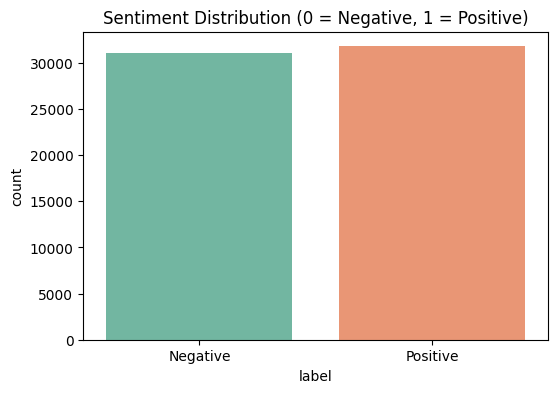

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x="label", data=df, palette="Set2")
plt.title("Sentiment Distribution (0 = Negative, 1 = Positive)")
plt.xticks([0,1], ["Negative", "Positive"])
plt.show()


# **horizontal bar plot showing how many reviews exist in each category**

/tmp/ipython-input-1070021795.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="category", data=df, order=df['category'].value_counts().index, palette="Set3")


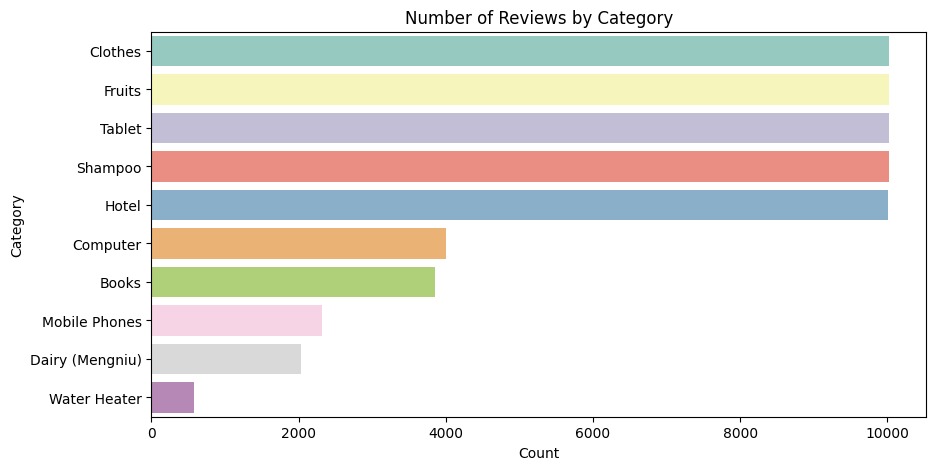

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(y="category", data=df, order=df['category'].value_counts().index, palette="Set3")
plt.title("Number of Reviews by Category")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()


# **grouped bar chart showing how positive vs negative reviews are distributed across each category.**

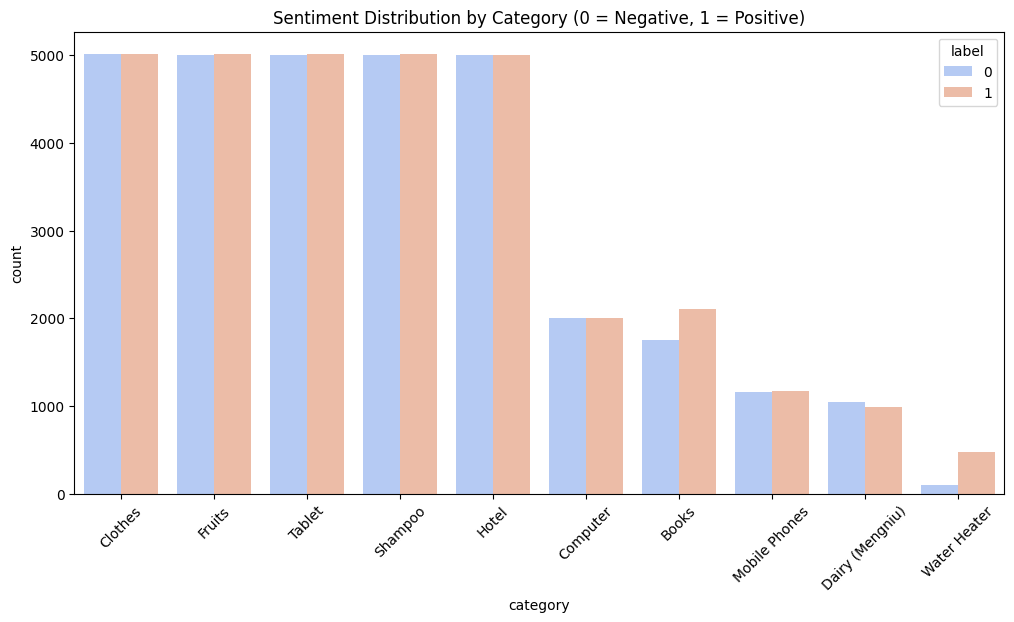

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x="category", hue="label", data=df, palette="coolwarm", order=df['category'].value_counts().index)
plt.title("Sentiment Distribution by Category (0 = Negative, 1 = Positive)")
plt.xticks(rotation=45)
plt.show()


# **review length analysis.**

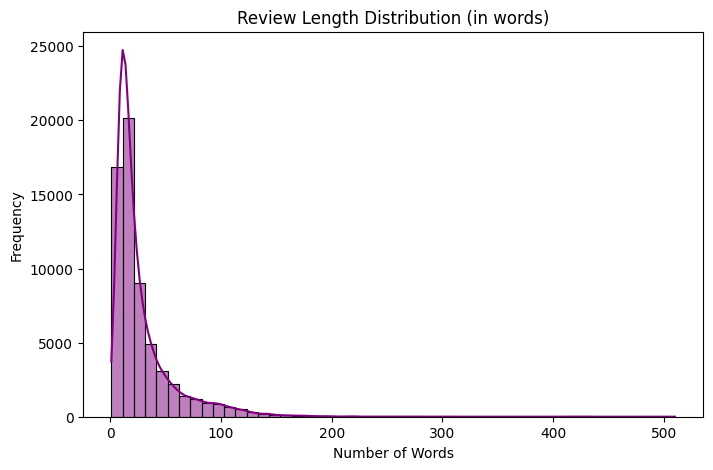

In [ ]:
# Fix duplicate column names
df.columns = ["cat_x", "label_x", "review_cn", "cat_y", "label", "review_en", "category"]

# Now calculate review length from English reviews
df["review_length"] = df["review_en"].astype(str).apply(lambda x: len(x.split()))

# Plot histogram of review lengths
plt.figure(figsize=(8,5))
sns.histplot(df["review_length"], bins=50, kde=True, color="purple")
plt.title("Review Length Distribution (in words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


# **average review length per category**

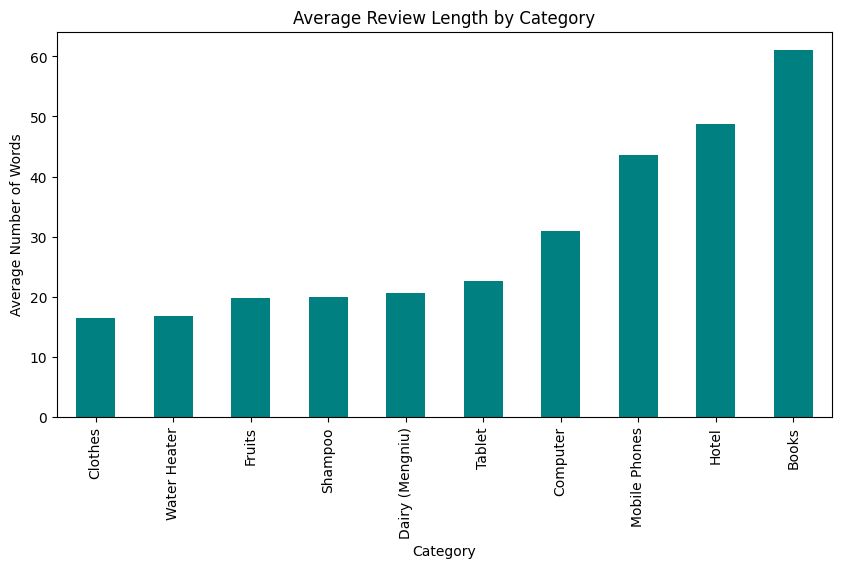

In [ ]:
# Average review length per category
avg_len = df.groupby("category")["review_length"].mean().sort_values()

plt.figure(figsize=(10,5))
avg_len.plot(kind="bar", color="teal")
plt.title("Average Review Length by Category")
plt.ylabel("Average Number of Words")
plt.xlabel("Category")
plt.show()


# **Word Clouds 🌥️ for both positive and negative reviews.**

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


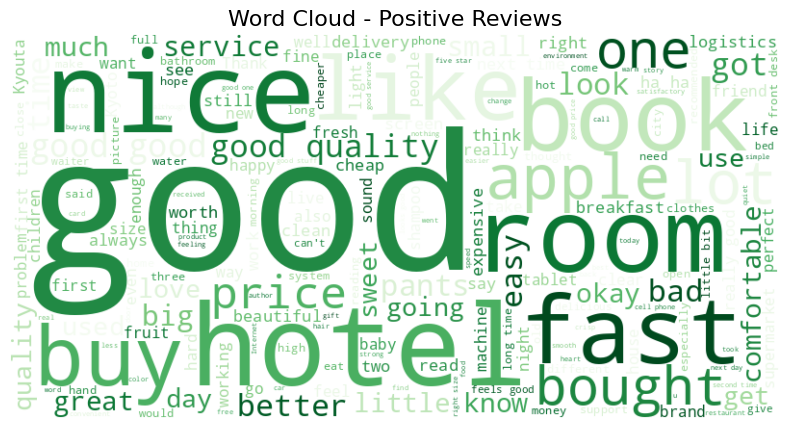

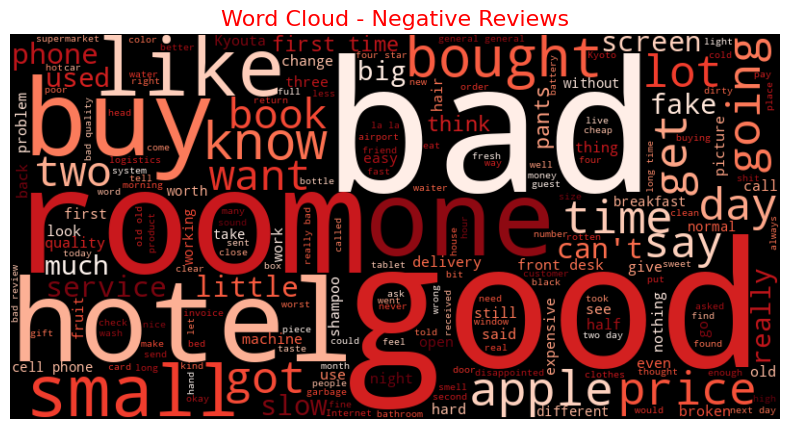

In [ ]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")

# Create stopwords list
stop_words = set(stopwords.words("english"))

# WordCloud for Positive Reviews
positive_text = " ".join(df[df["label"] == 1]["review_en"].astype(str).tolist())
wordcloud_pos = WordCloud(width=800, height=400, background_color="white",
                          stopwords=stop_words, colormap="Greens").generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_pos, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Positive Reviews", fontsize=16)
plt.show()


# WordCloud for Negative Reviews
negative_text = " ".join(df[df["label"] == 0]["review_en"].astype(str).tolist())
wordcloud_neg = WordCloud(width=800, height=400, background_color="black",
                          stopwords=stop_words, colormap="Reds").generate(negative_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud_neg, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud - Negative Reviews", fontsize=16, color="red")
plt.show()


# **most frequent words from reviews in a given category (in your example: Books).**

/tmp/ipython-input-916818855.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Frequency", y="Word", data=books_df, palette="viridis")


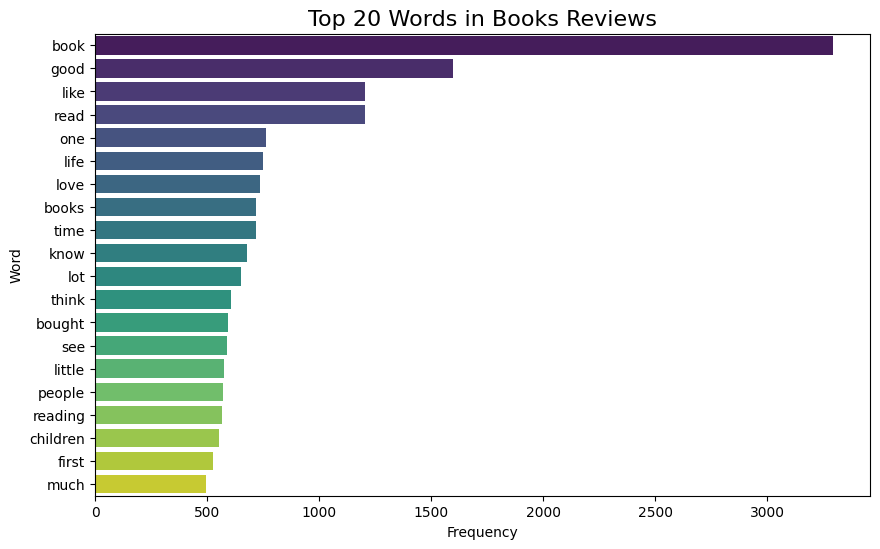

In [ ]:
from collections import Counter
import re
import seaborn as sns

def get_top_words(texts, n=20):
    # Join all reviews
    text = " ".join(texts.astype(str).tolist()).lower()
    # Remove non-alphabetic chars
    words = re.findall(r'\b[a-z]{3,}\b', text)
    # Remove stopwords
    words = [w for w in words if w not in stop_words]
    return Counter(words).most_common(n)

# Example: Top 20 words in "Books"
books_words = get_top_words(df[df["category"] == "Books"]["review_en"], 20)

# Convert to DataFrame for plotting
books_df = pd.DataFrame(books_words, columns=["Word", "Frequency"])

plt.figure(figsize=(10,6))
sns.barplot(x="Frequency", y="Word", data=books_df, palette="viridis")
plt.title("Top 20 Words in Books Reviews", fontsize=16)
plt.show()
